In [ ]:
class Node():
  def __init__(self,state,parent,action):
    self.state=state
    self.parent=parent
    self.action=action
class StackFrontier():
  def __init__(self):
    self.frontier=[]
  def add(self,node): 
    self.frontier.append(node)
  def contains_state(self,state):
    return any(node.state==state for node in self.frontier)
  def empty(self):
    return len(self.frontier)==0
  def remove(self):
    if self.empty():
      raise Exception("empty frontier")
    else:
      node=self.frontier[-1]
      self.frontier=self.frontier[:-1]
      return node
class QueueFrontier(StackFrontier):
  def remove(self):
    if self.empty():
      raise Exception("empty frontier")
    else:
      node=self.frontier[0]
      self.frontier=self.frontier[1:]
      return node

In [ ]:
import cv2 as cv
import random as r
import numpy as np
import os
from google.colab.patches import cv2_imshow
#{'up':0,'down':1,'left':2,'right':3}
def env():
  global x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6
  img=np.zeros((500,500,3),dtype='uint8')
  img[0:500,0:10,0]=255
  img[0:10,0:500,0]=255
  img[490:500,0:500,0]=255
  img[0:500,490:500,0]=255
  x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6=(110, 310, 290, 340, 310, 320, 130, 320, 330, 370, 190, 210)
  #x1=r.randrange(100,400,10)
  #y1=r.randrange(x1,400,10)
  #x2=r.randrange(100,400,10)
  #y2=r.randrange(x2,400,10)
  #x3=r.randrange(100,400,10)
  #y3=r.randrange(x3,400,10)
  #x4=r.randrange(100,400,10)
  #y4=r.randrange(x4,400,10)
  #x5=r.randrange(100,400,10)
  #y5=r.randrange(x5,400,10)
  #x6=r.randrange(100,400,10)
  #y6=r.randrange(x6,400,10)
  img[x1:y1,x2:y2,0]=255
  img[x3:y3,x4:y4,0]=255
  img[x5:y5,x6:y6,0]=255
  return img#,(s_x,s_y)
img=env()

In [ ]:
def snake(s_x,s_y):
    img[s_x:s_x+10,s_y:s_y+10,1]=255
    return s_x,s_y
def food():
    f_x=r.randrange(10,490,10)
    f_y=r.randrange(10,490,10)        
    while img[f_x,f_y,2]!=img[f_x,f_y,0] or img[f_x,f_y,2]!=img[f_x,f_y,1]:
        f_x=r.randrange(10,490,10)
        f_y=r.randrange(10,490,10)
    img[f_x:f_x+10,f_y:f_y+10,2]=255
    return f_x,f_y
#s_x,s_y=snake(s_x,s_y)
f_x,f_y=food()

def actions(s_x,s_y):
  acts=[]
  if img[s_x+10,s_y,0]!=255:
    acts.append(1)
  if img[s_x-10,s_y,0]!=255:
    acts.append(0)
  if img[s_x,s_y+10,0]!=255:
    acts.append(3)
  if img[s_x,s_y-10,0]!=255:
    acts.append(2)
  else:
    return acts
  return acts
def act(action,s_x,s_y,f_x,f_y):
    s_x1,s_y1=snake(s_x,s_y)
    state=cv.resize(img.copy(),(100,100))
    continu=False
    if(action==0):
        img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
        s_x1=s_x1-10
    elif(action==1):
        img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
        s_x1=s_x1+10
    elif(action==2):
        img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
        s_y1=s_y1-10
    elif(action==3):
        img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
        s_y1=s_y1+10
    else:
      action=None
    s_x,s_y=snake(s_x,s_y)
    next_state=cv.resize(img.copy(),(100,100))
    if img[s_x,s_y,1]==img[s_x,s_y,2]:
        img[f_x:f_x+10,f_y:f_y+10,2]=0
        #f_x,f_y=food()
    if img[s_x,s_y,1]==img[s_x,s_y,0]:
        continu=True
    return s_x1,s_y1,f_x,f_y

In [ ]:
def neighbour(s_x,s_y,f_x,f_y):
  perform_as=[]
  for i in actions(s_x,s_y):
    sx,sy,f_x,f_y=act(i,s_x,s_y,f_x,f_y)
    perform_as.append(((sx,sy,f_x,f_y),i))
  return perform_as

In [ ]:
start=Node(state=(10,10,f_x,f_y),parent=None,action=None)
frontier = QueueFrontier()
frontier.add(start)
explored = set()
while True:
  if frontier.empty():
    raise Exception("no solution")
  node = frontier.remove()
  s_x,s_y,f_x,f_y=node.state
  if s_x==f_x and s_y==f_y:
    actionss=[]
    while node.parent is not None:     
      actionss.append(node.action)
      node = node.parent
    actionss.reverse()
    break
  explored.add(node.state)
  for s,a in neighbour(s_x,s_y,f_x,f_y):
    if not frontier.contains_state(s) and s not in explored:
      child = Node(state=s, parent=node, action=a)
      frontier.add(child)

In [ ]:
def env(s_x,s_y,f_x,f_y):
  img=np.zeros((500,500,3),dtype='uint8')
  img[s_x:s_x+10,s_y:s_y+10,1]=255
  img[f_x:f_x+10,f_y:f_y+10,2]=255 
  img[0:500,0:10,0]=255
  img[0:10,0:500,0]=255
  img[490:500,0:500,0]=255
  img[0:500,490:500,0]=255
  img[x1:y1,x2:y2,0]=255
  img[x3:y3,x4:y4,0]=255
  img[x5:y5,x6:y6,0]=255
  return img#,(s_x,s_y)
img=env(10,10,f_x,f_y)
def act(action,s_x,s_y,f_x,f_y):
    s_x,s_y=snake(s_x,s_y)
    state=cv.resize(img.copy(),(100,100))
    continu=False
    if(action==0):
        img[s_x:s_x+10,s_y:s_y+10,1]=0
        s_x=s_x-10
    elif(action==1):
        img[s_x:s_x+10,s_y:s_y+10,1]=0
        s_x=s_x+10
    elif(action==2):
        img[s_x:s_x+10,s_y:s_y+10,1]=0
        s_y=s_y-10
    elif(action==3):
        img[s_x:s_x+10,s_y:s_y+10,1]=0
        s_y=s_y+10
    else:
      action=None
    s_x,s_y=snake(s_x,s_y)
    next_state=cv.resize(img.copy(),(100,100))
    if img[s_x,s_y,1]==img[s_x,s_y,2]:
        img[f_x:f_x+10,f_y:f_y+10,2]=0
        #f_x,f_y=food()
    if img[s_x,s_y,1]==img[s_x,s_y,0]:
        continu=True
    return s_x,s_y,f_x,f_y

In [ ]:
from time import sleep
from IPython.display import clear_output
s_x,s_y,f_x,f_y=act(actionss[0],10,10,f_x,f_y)
for ac in actionss[1:]:
  clear_output(wait=True)
  s_x,s_y,f_x,f_y=act(ac,s_x,s_y,f_x,f_y)
  cv2_imshow(img)
  sleep(0.2)

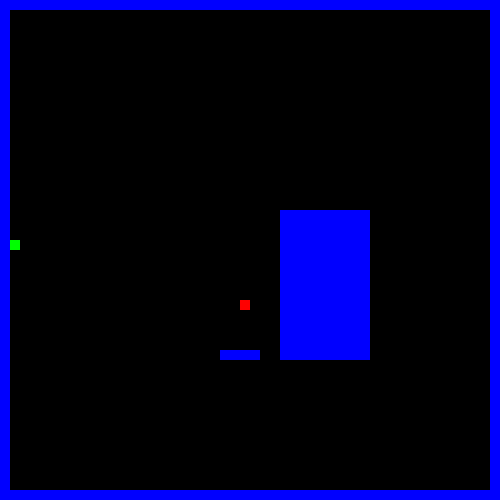

In [ ]:
while 1:
  class Node():
    def __init__(self,state,parent,action):
      self.state=state
      self.parent=parent
      self.action=action
  class StackFrontier():
    def __init__(self):
      self.frontier=[]
    def add(self,node): 
      self.frontier.append(node)
    def contains_state(self,state):
      return any(node.state==state for node in self.frontier)
    def empty(self):
      return len(self.frontier)==0
    def remove(self):
      if self.empty():
        raise Exception("empty frontier")
      else:
        node=self.frontier[-1]
        self.frontier=self.frontier[:-1]
        return node
  class QueueFrontier(StackFrontier):
    def remove(self):
      if self.empty():
        raise Exception("empty frontier")
      else:
        node=self.frontier[0]
        self.frontier=self.frontier[1:]
        return node
  import cv2 as cv
  import random as r
  import numpy as np
  import os
  from google.colab.patches import cv2_imshow
  #{'up':0,'down':1,'left':2,'right':3}
  def env():
    global x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6
    img=np.zeros((500,500,3),dtype='uint8')
    img[0:500,0:10,0]=255
    img[0:10,0:500,0]=255
    img[490:500,0:500,0]=255
    img[0:500,490:500,0]=255
    #x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6=(110, 310, 290, 340, 310, 320, 130, 320, 330, 370, 190, 210)
    x1=r.randrange(100,400,10)
    y1=r.randrange(x1,400,10)
    x2=r.randrange(100,400,10)
    y2=r.randrange(x2,400,10)
    x3=r.randrange(100,400,10)
    y3=r.randrange(x3,400,10)
    x4=r.randrange(100,400,10)
    y4=r.randrange(x4,400,10)
    x5=r.randrange(100,400,10)
    y5=r.randrange(x5,400,10)
    x6=r.randrange(100,400,10)
    y6=r.randrange(x6,400,10)
    img[x1:y1,x2:y2,0]=255
    img[x3:y3,x4:y4,0]=255
    img[x5:y5,x6:y6,0]=255
    return img#,(s_x,s_y)
  img=env()
  def snake(s_x,s_y):
      img[s_x:s_x+10,s_y:s_y+10,1]=255
      return s_x,s_y
  def food():
      f_x=r.randrange(10,490,10)
      f_y=r.randrange(10,490,10)        
      while img[f_x,f_y,2]!=img[f_x,f_y,0] or img[f_x,f_y,2]!=img[f_x,f_y,1]:
          f_x=r.randrange(10,490,10)
          f_y=r.randrange(10,490,10)
      img[f_x:f_x+10,f_y:f_y+10,2]=255
      return f_x,f_y
  #s_x,s_y=snake(s_x,s_y)
  f_x,f_y=food()

  def actions(s_x,s_y):
    acts=[]
    if img[s_x+10,s_y,0]!=255:
      acts.append(1)
    if img[s_x-10,s_y,0]!=255:
      acts.append(0)
    if img[s_x,s_y+10,0]!=255:
      acts.append(3)
    if img[s_x,s_y-10,0]!=255:
      acts.append(2)
    else:
      return acts
    return acts
  def act(action,s_x,s_y,f_x,f_y):
      s_x1,s_y1=snake(s_x,s_y)
      state=cv.resize(img.copy(),(100,100))
      continu=False
      if(action==0):
          img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
          s_x1=s_x1-10
      elif(action==1):
          img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
          s_x1=s_x1+10
      elif(action==2):
          img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
          s_y1=s_y1-10
      elif(action==3):
          img[s_x1:s_x1+10,s_y1:s_y1+10,1]=0
          s_y1=s_y1+10
      else:
        action=None
      s_x,s_y=snake(s_x,s_y)
      next_state=cv.resize(img.copy(),(100,100))
      if img[s_x,s_y,1]==img[s_x,s_y,2]:
          img[f_x:f_x+10,f_y:f_y+10,2]=0
          #f_x,f_y=food()
      if img[s_x,s_y,1]==img[s_x,s_y,0]:
          continu=True
      return s_x1,s_y1,f_x,f_y
  def neighbour(s_x,s_y,f_x,f_y):
    perform_as=[]
    for i in actions(s_x,s_y):
      sx,sy,f_x,f_y=act(i,s_x,s_y,f_x,f_y)
      perform_as.append(((sx,sy,f_x,f_y),i))
    return perform_as
  start=Node(state=(10,10,f_x,f_y),parent=None,action=None)
  frontier = QueueFrontier()
  frontier.add(start)
  explored = set()
  while True:
    if frontier.empty():
      raise Exception("no solution")
    node = frontier.remove()
    s_x,s_y,f_x,f_y=node.state
    if s_x==f_x and s_y==f_y:
      actionss=[]
      while node.parent is not None:     
        actionss.append(node.action)
        node = node.parent
      actionss.reverse()
      break
    explored.add(node.state)
    for s,a in neighbour(s_x,s_y,f_x,f_y):
      if not frontier.contains_state(s) and s not in explored:
        child = Node(state=s, parent=node, action=a)
        frontier.add(child)
  def env(s_x,s_y,f_x,f_y):
    img=np.zeros((500,500,3),dtype='uint8')
    img[s_x:s_x+10,s_y:s_y+10,1]=255
    img[f_x:f_x+10,f_y:f_y+10,2]=255 
    img[0:500,0:10,0]=255
    img[0:10,0:500,0]=255
    img[490:500,0:500,0]=255
    img[0:500,490:500,0]=255
    img[x1:y1,x2:y2,0]=255
    img[x3:y3,x4:y4,0]=255
    img[x5:y5,x6:y6,0]=255
    return img#,(s_x,s_y)
  img=env(10,10,f_x,f_y)
  def act(action,s_x,s_y,f_x,f_y):
      s_x,s_y=snake(s_x,s_y)
      state=cv.resize(img.copy(),(100,100))
      continu=False
      if(action==0):
          img[s_x:s_x+10,s_y:s_y+10,1]=0
          s_x=s_x-10
      elif(action==1):
          img[s_x:s_x+10,s_y:s_y+10,1]=0
          s_x=s_x+10
      elif(action==2):
          img[s_x:s_x+10,s_y:s_y+10,1]=0
          s_y=s_y-10
      elif(action==3):
          img[s_x:s_x+10,s_y:s_y+10,1]=0
          s_y=s_y+10
      else:
        action=None
      s_x,s_y=snake(s_x,s_y)
      next_state=cv.resize(img.copy(),(100,100))
      if img[s_x,s_y,1]==img[s_x,s_y,2]:
          img[f_x:f_x+10,f_y:f_y+10,2]=0
          #f_x,f_y=food()
      if img[s_x,s_y,1]==img[s_x,s_y,0]:
          continu=True
      return s_x,s_y,f_x,f_y
  from time import sleep
  from IPython.display import clear_output
  s_x,s_y,f_x,f_y=act(actionss[0],10,10,f_x,f_y)
  for ac in actionss[1:]:
    clear_output(wait=True)
    s_x,s_y,f_x,f_y=act(ac,s_x,s_y,f_x,f_y)
    cv2_imshow(img)
    sleep(0.2)

In [ ]:
f_x,f_y=(240, 390)

In [ ]:
x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6=(160, 350, 200, 370, 110, 190, 160, 350, 250, 300, 370, 390)